02 - `yai`
==========

- ***`yai`*** finds kNNs given reference and, optionally, target observations. 
- This function is the main function in the package. 
- It returns an object of class `yai`. 
- A key role played in this function is to separate the observations into reference and target observations. 

### Target and Reference Values

- Target observations are those with values for X variables and not for Y variables
- Reference observations are those with no missing values for X and Y variables.


In [11]:
install.packages(c("yaImpute","ccaPP"))
library(yaImpute)
library(ccaPP)                 

Installing packages into '/home/nbcommon/R'
(as 'lib' is unspecified)


In [14]:
data(iris)
# set the random number seed so that example results are consistent
# normally, leave out this command
set.seed(12345)
# form some test data, y's are defined only for reference
# observations.
refs=sample(rownames(iris),50)
head(refs,6)
x <- iris[,1:2] # Sepal.Length Sepal.Width
head(x,3)
y <- iris[refs,3:4] # Petal.Length Petal.Width
head(y,3)

[1] "109" "131" "113" "149" "67"  "25"

Sepal.Length,Sepal.Width
5.1,3.5
4.9,3.0
4.7,3.2


,Petal.Length,Petal.Width
109,5.8,1.8
131,6.1,1.9
113,5.5,2.1


In [15]:
# build yai objects using 2 methods
msn <- yai(x=x,y=y)
mal <- yai(x=x,y=y,method="mahalanobis")

In [16]:
# compare these results using the generalized mean distances. mal wins!
grmsd(mal,msn)


mal      msn 
1.007285 1.246437

### ccaPP
Canonical Correlation Analysis via Projection Pursuit

In [18]:
# use projection pursuit and specify "ppControl". 
# This reqires package ccaPP.
msnPP <- yai(x=x,y=y,method="msnPP",ppControl=c(method="kendall",search="proj"))

grmsd(mal,msnPP,msn)


mal    msnPP      msn 
1.007285 1.074983 1.246437

In [19]:
data(MoscowMtStJoe)
# convert polar slope and aspect measurements to cartesian
# (which is the same as Stage's (1976) transformation).
polar <- MoscowMtStJoe[,40:41]
polar[,1] <- polar[,1]*.01 # slope proportion
polar[,2] <- polar[,2]*(pi/180) # aspect radians

In [20]:
cartesian <- t(apply(polar,1,function (x)
{return (c(x[1]*cos(x[2]),x[1]*sin(x[2]))) }))

colnames(cartesian) <- c("xSlAsp","ySlAsp")

In [21]:
x <- cbind(MoscowMtStJoe[,37:39],cartesian,MoscowMtStJoe[,42:64])
head(x,3)

EASTING,NORTHING,ELEVMEAN,xSlAsp,ySlAsp,B1MEAN,B2MEAN,B3MEAN,B4MEAN,B5MEAN,...,INTMIN,INTMAX,HTMEAN,HTSTD,HTMIN,HTMAX,CCMEAN,CCSTD,CCMIN,CCMAX
571920.0,5234917,774.2451,-0.2660646,-0.10091865,1357.875,1146.750,826.125,537.25,1210.750,...,54,151,32.364,2.460,28,37,90.682,10.835,67,100
568367.9,5224512,1036.8050,0.1530449,-0.08691548,1234.750,990.250,591.250,305.75,924.500,...,38,160,29.727,3.466,21,35,97.864,4.994,80,100
571994.6,5221844,1714.9190,0.1013015,-0.14528742,1116.143,880.857,521.429,261.00,541.714,...,50,155,27.524,4.521,18,35,88.952,6.644,78,100


In [26]:
y <- MoscowMtStJoe[,1:35]
head(y,3)

ABGR_BA,ABLA_BA,ACGL_BA,BEOC_BA,LAOC_BA,PICO_BA,PIEN_BA,PIMO_BA,PIPO_BA,POBA_BA,...,PIMO_TD,PIPO_TD,POBA_TD,POTR_TD,PSME_TD,SAEX_TD,THPL_TD,TSHE_TD,TSME_TD,UNKN_TD
0.00000,0.0000000,0,0,0.00000,0,0.0000000,0,0,0,...,0,0,0,0,518.92084,0,0.0000,0.00000,0.0000,12.35526
20.90473,0.0000000,0,0,19.88266,0,0.5528975,0,0,0,...,0,0,0,0,24.71052,0,457.1446,12.35526,0.0000,12.35526
0.00000,0.7423694,0,0,5.04691,0,0.9313407,0,0,0,...,0,0,0,0,0.00000,0,0.0000,0.00000,469.4998,0.00000


In [27]:
msn <- yai(x=x, y=y, method="msn", k=1)
# msn

In [28]:
mal <- yai(x=x, y=y, method="mahalanobis", k=1)
# mal

In [29]:
# compare these results using the generalized mean distances..
grmsd(mal,msn)

Warning message in grmsd(mal, msn):
"rank deficiency in mal was addressed by removing: SAEX_BA.o, POBA_TD.o, POTR_TD.o, SAEX_TD.o, SAEX_BA, POBA_TD, POTR_TD, SAEX_TD"Warning message in grmsd(mal, msn):
"rank deficiency in msn was addressed by removing: SAEX_BA.o, POBA_TD.o, POTR_TD.o, SAEX_TD.o, SAEX_BA, POBA_TD, POTR_TD, SAEX_TD"

msn      mal 
1.252911 1.357615

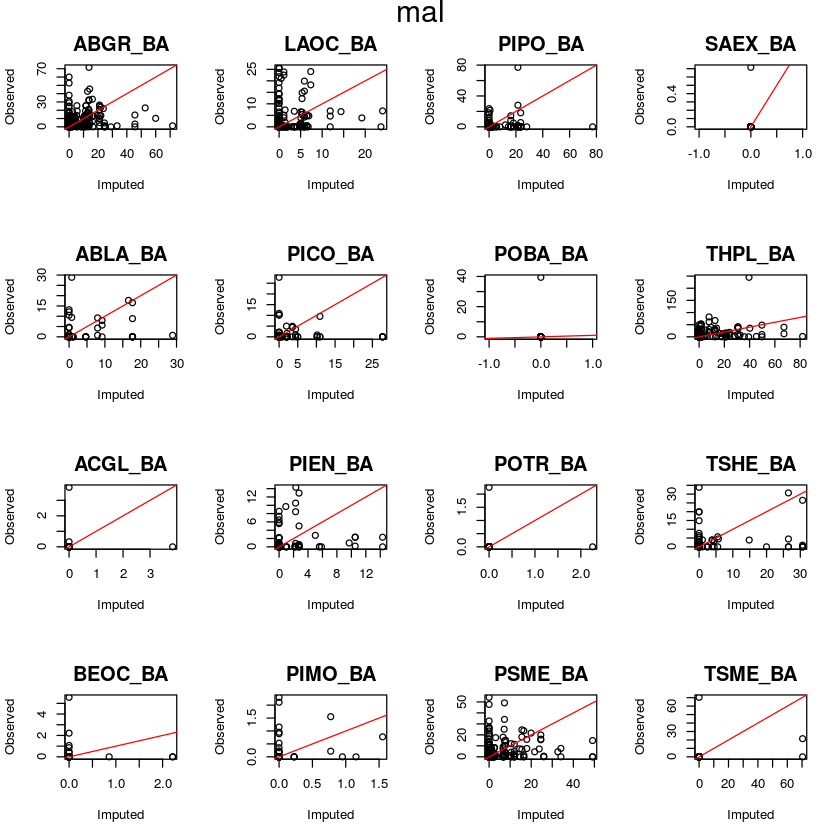

In [30]:
# the results can be plotted.
plot(mal,vars=yvars(mal)[1:16])




In [32]:
# reduce the plant community data for randomForest.
yba <- MoscowMtStJoe[,1:17]
ybaB <- whatsMax(yba,nbig=7) # see help on whatsMax
rf <- yai(x=x, y=ybaB, method="randomForest", k=1)
# build the imputations for the original y's
rforig <- impute(rf,ancillaryData=y)
# compare the results using individual rmsd's
compare.yai(mal,msn,rforig)

,mal.rmsdS,msn.rmsdS,rforig.rmsdS
ABGR_BA,1.3320746,1.2299857,0.9143698
ABLA_BA,1.4307948,0.9343005,1.2281613
ACGL_BA,1.4124081,1.7288044,1.7308742
BEOC_BA,1.1365392,1.0782388,2.0072885
LAOC_BA,1.1544195,1.0281362,1.0701537
PICO_BA,1.9825784,1.1165344,1.2763674
PIEN_BA,1.3210013,1.1220116,1.2601067
PIMO_BA,1.0481852,1.3349768,1.1312086
PIPO_BA,1.5474435,1.8634704,0.8347220
POBA_BA,1.0000000,1.0000000,1.4142136


,rforig2.rmsdS,rforig.rmsdS
ABGR_BA,1.1118244,0.9143698
ABLA_BA,1.3167797,1.2281613
ACGL_BA,2.0010285,1.7308742
BEOC_BA,1.5400293,2.0072885
LAOC_BA,0.9997220,1.0701537
PICO_BA,1.0787768,1.2763674
PIEN_BA,1.4119463,1.2601067
PIMO_BA,1.1323121,1.1312086
PIPO_BA,1.2378290,0.8347220
POBA_BA,1.4142136,1.4142136


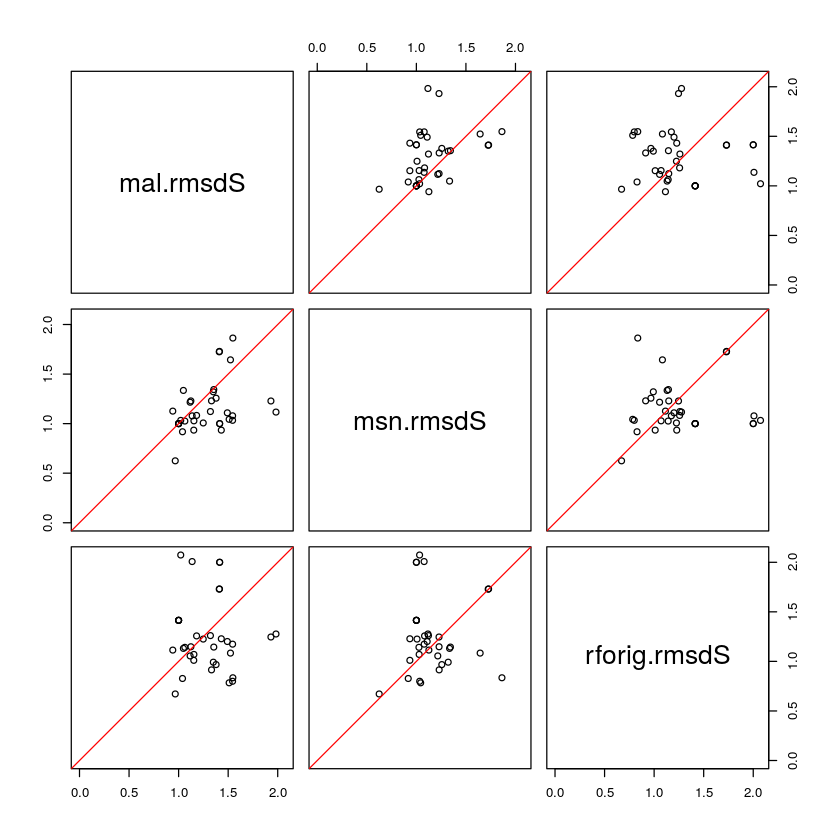

In [33]:


plot(compare.yai(mal,msn,rforig))
# build another randomForest case forcing regression
# to be used for continuous variables. The answers differ
# but one is not clearly better than the other.
rf2 <- yai(x=x, y=ybaB, method="randomForest", rfMode="regression")
rforig2 <- impute(rf2,ancillaryData=y)
compare.yai(rforig2,rforig)
